In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
from arc import*
import matplotlib.ticker as ticker

In [3]:
df = pd.read_excel('all_6_system-same-states-9sept_T0>3.1_all_unique_set1.xlsx')

In [4]:
df

,n1,l1,j1,n2,l2,j2,n3,l3,j3,LP,Te,Z,A,Rfq,T0
0,8,5,4.5,9,3,2.5,14,4,3.5,1.0000,0.4500,1,1,9146.0658,3.1661
1,8,5,4.5,9,3,2.5,14,4,3.5,0.6694,0.6231,3,7,7478.4824,3.1645
2,8,5,4.5,9,3,2.5,14,4,3.5,0.1736,0.3461,11,23,3806.6573,3.1723
3,8,5,4.5,9,3,2.5,14,4,3.5,0.1736,0.7961,19,41,3798.3096,3.1867
4,8,5,4.5,9,3,2.5,14,4,3.5,0.6694,0.0865,37,85,7449.6358,3.2264
5,8,5,4.5,9,3,2.5,14,4,3.5,0.0083,0.1904,55,133,823.1362,3.2482


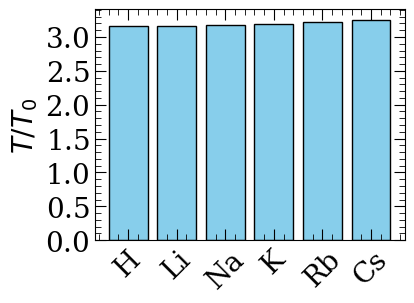

In [5]:
import matplotlib.pyplot as plt

# Example atom labels
atoms_labels = ["H", "Li", "Na", "K", "Rb", "Cs"]



# Plotting
plt.figure(figsize=(4,3))

# Bar plot
plt.bar(atoms_labels, df.T0.values, color='skyblue', edgecolor='black')
# Set y-axis to scientific notation
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(True)
plt.gca().yaxis.get_major_formatter().set_powerlimits((-1, 1))
# Set the font size of the scientific notation offset text
plt.gca().yaxis.offsetText.set_fontsize(20)
# Adding labels and title
# plt.xlabel("Atoms", fontsize=15)
plt.ylabel(r'$T/T_0$', fontsize=20)
# plt.title("S Values for Different Atoms", fontsize=18)

# Adjusting ticks
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
# plt.ylim(2.00,2.23)
# Adding grid for better readability
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
# plt.tight_layout()
plt.show()


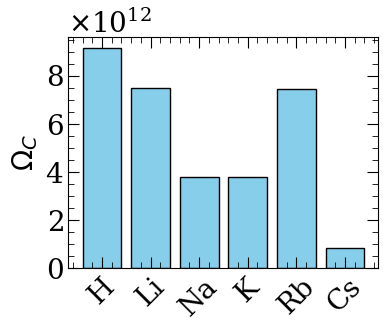

In [6]:
import matplotlib.pyplot as plt

# Example atom labels
atoms_labels = ["H", "Li", "Na", "K", "Rb", "Cs"]



# Plotting
plt.figure(figsize=(4,3))

# Bar plot
plt.bar(atoms_labels, df.Rfq.values*10e8, color='skyblue', edgecolor='black')
# Set y-axis to scientific notation
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(True)
plt.gca().yaxis.get_major_formatter().set_powerlimits((-1, 1))
# Set the font size of the scientific notation offset text
plt.gca().yaxis.offsetText.set_fontsize(20)
# Adding labels and title
# plt.xlabel("Atoms", fontsize=15)
plt.ylabel(r'$\Omega_C$', fontsize=20)
# plt.title("S Values for Different Atoms", fontsize=18)

# Adjusting ticks
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
# plt.ylim(2.00,2.23)
# Adding grid for better readability
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
# plt.tight_layout()
plt.show()

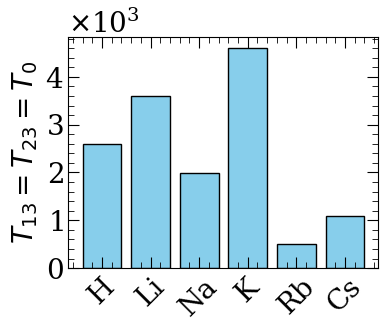

In [7]:
import matplotlib.pyplot as plt

# Example atom labels
atoms_labels = ["H", "Li", "Na", "K", "Rb", "Cs"]



# Plotting
plt.figure(figsize=(4,3))

# Bar plot
plt.bar(atoms_labels, df.Te.values*5778, color='skyblue', edgecolor='black')
# Set y-axis to scientific notation
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(True)
plt.gca().yaxis.get_major_formatter().set_powerlimits((-1, 1))
# Set the font size of the scientific notation offset text
plt.gca().yaxis.offsetText.set_fontsize(20)
# Adding labels and title
# plt.xlabel("Atoms", fontsize=15)
plt.ylabel(r'$T_{13}=T_{23}=T_0$', fontsize=20)
# plt.title("S Values for Different Atoms", fontsize=18)

# Adjusting ticks
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
# plt.ylim(2.00,2.23)
# Adding grid for better readability
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
# plt.tight_layout()
plt.show()

In [8]:
atom = [Hydrogen(), Lithium7(), Sodium(), Potassium41(), Rubidium85(), Caesium()]

In [9]:
# atom =Caesium()

In [10]:
# atom.getTransitionRate?

In [11]:
import numpy as np
import pandas as pd

# List of atomic models
atoms = [Hydrogen(), Lithium6(), Sodium(), Potassium39(), Rubidium87(), Caesium()]

# Constants
hbar = 1.0545718e-34  # Reduced Planck constant, in J*s
k_b = 1.380649e-23    # Boltzmann constant, in J/K

# Initialize a list to store ergotropy results
ergotropy_results = []
erg_array = []
w13 = []
w23 = []
sol_rho_22 = []
sol_rho_33 = []
work_al_be_array = []
ent_array = []
# Loop through each atom and its corresponding index
for atom, i in zip(atoms, range(len(atoms))):
    # Extract relevant values for the current index
    Gamma31 = atom.getTransitionRate(df.n3.values[i], df.l3.values[i], df.j3.values[i], df.n1.values[i], df.l1.values[i], df.j1.values[i])
    Gamma23 = atom.getTransitionRate(df.n2.values[i], df.l2.values[i], df.j2.values[i], df.n3.values[i], df.l3.values[i], df.j3.values[i])
    omega13 = atom.getTransitionFrequency(df.n1.values[i], df.l1.values[i], df.j1.values[i], df.n3.values[i], df.l3.values[i], df.j3.values[i])
    omega23 = atom.getTransitionFrequency(df.n2.values[i], df.l2.values[i], df.j2.values[i], df.n3.values[i], df.l3.values[i], df.j3.values[i])
    T13 = df.Te.values[i] * 5778
    T23 = df.Te.values[i] * 5778
    w13.append(omega13)
    w23.append(omega23)
    # Compute R13 and R23
    R13 = atom.getTransitionRate(df.n3.values[i], df.l3.values[i], df.j3.values[i], df.n1.values[i], df.l1.values[i], df.j1.values[i], df.Te.values[i] * 5778)
    R23 = atom.getTransitionRate(df.n2.values[i], df.l2.values[i], df.j2.values[i], df.n3.values[i], df.l3.values[i], df.j3.values[i], df.Te.values[i] * 5778)
    Omega = df.Rfq.values[i]

    sol_rho1 = (Omega + R23) / (2 * Omega + 3 * R23)
    sol_rho2 = R23 / (2 * Omega + 3 * R23)
    sol_rho3 = (Omega + R23) / (2 * Omega + 3 * R23)
    sol_rho_22.append(sol_rho2)
    sol_rho_33.append(sol_rho3)
    e_1 = np.pi*2*hbar*atom.getEnergy(df.n1.values[i], df.l1.values[i], df.j1.values[i]) * 2.41804e14
    e_2 = np.pi*2*hbar*atom.getEnergy(df.n2.values[i], df.l2.values[i], df.j2.values[i]) * 2.41804e14
    e_3 = np.pi*2*hbar*atom.getEnergy(df.n3.values[i], df.l3.values[i], df.j3.values[i]) * 2.41804e14
    
    work_al_be = (e_3-e_2)+k_b*df.Te.values[i]*5778*np.log(np.array(sol_rho3)/np.array(sol_rho2))
    work_al_be_array.append(work_al_be)
    ent = k_b*df.Te.values[i]*5778*np.log(np.array(sol_rho3)/np.array(sol_rho2))
    ent_array.append(ent)
    result_matrix_energy = np.diag([e_1, e_2, e_3])
    result_matrix_pop_ss = np.diag([sol_rho1, sol_rho2, sol_rho3])
#     print(result_matrix_pop_ss)
    result_final_population = np.matmul(result_matrix_energy, result_matrix_pop_ss)

    # Sort the diagonal of result_matrix_pop_ss
    def sort_diagonal(matrix):
        sorted_diagonal = np.sort(np.diagonal(matrix))[::-1]
        sorted_matrix = np.copy(matrix)
        np.fill_diagonal(sorted_matrix, sorted_diagonal)
        return sorted_matrix

    sorted_matrix_pop_ss = sort_diagonal(result_matrix_pop_ss)
    result_final_passive = np.matmul(result_matrix_energy, sorted_matrix_pop_ss)

    # Calculate traces and ergotropy
    trace_pop = np.trace(result_final_population)
    trace_passive = np.trace(result_final_passive)
    ergotropy = trace_pop - trace_passive

    # Append results to the list
    erg_array.append(ergotropy)
    ergotropy_results.append({
        'Atom': atom.__class__.__name__,
        'Index': i,
        'Ergotropy': ergotropy
    })

# Convert the results to a DataFrame for easier handling
ergotropy_df = pd.DataFrame(ergotropy_results)
print(ergotropy_df)


[[0.36220369 0.         0.        ]
 [0.         0.27559263 0.        ]
 [0.         0.         0.36220369]]
[[0.35065463 0.         0.        ]
 [0.         0.29869075 0.        ]
 [0.         0.         0.35065463]]
[[0.35142742 0.         0.        ]
 [0.         0.29714517 0.        ]
 [0.         0.         0.35142742]]
[[0.34041962 0.         0.        ]
 [0.         0.31916076 0.        ]
 [0.         0.         0.34041962]]
[[0.45557191 0.         0.        ]
 [0.         0.08885617 0.        ]
 [0.         0.         0.45557191]]
[[0.34315634 0.         0.        ]
 [0.         0.31368732 0.        ]
 [0.         0.         0.34315634]]
          Atom  Index     Ergotropy
0     Hydrogen      0  1.366891e-21
1     Lithium6      1  8.205041e-22
2       Sodium      2  8.576324e-22
3  Potassium39      3  3.368393e-22
4   Rubidium87      4  5.822248e-21
5      Caesium      5  4.705013e-22


In [12]:
erg_array = np.array(erg_array)

In [49]:
rho_rat = np.array(sol_rho_33)/np.array(sol_rho_22)
rho_diff= np.array(sol_rho_33)-np.array(sol_rho_22)

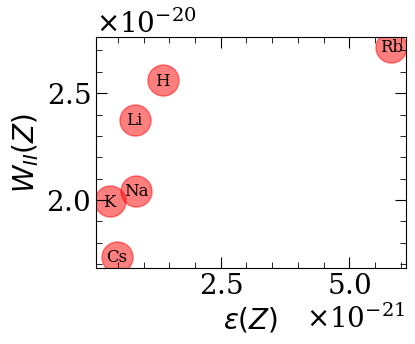

In [50]:
plt.figure(figsize=(4, 3))
# # Atomic model labels
labels = ['H', 'Li', 'Na', 'K', 'Rb', 'Cs']

# Scatter plot with atomic symbols as annotations
for i in range(len(labels)):
    plt.scatter(erg_array[i], work_al_be_array[i], color='red', s = 500, alpha = 0.5)  # Add black dots for clarity (optional)
    plt.text(erg_array[i], work_al_be_array[i], labels[i], fontsize=12, ha='center', va='center')  # Add atomic symbols

# Set the axis labels with fontsize
plt.xlabel("$\epsilon(Z)$", fontsize=20)
plt.ylabel("$W_{II}(Z)$", fontsize=20)

# Set tick parameters
plt.tick_params(axis='both', which='major', labelsize=20)

# Set y-axis to scientific notation
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(True)
plt.gca().yaxis.get_major_formatter().set_powerlimits((-1, 1))
# Set the font size of the scientific notation offset text
plt.gca().yaxis.offsetText.set_fontsize(20)
# Set x-axis to scientific notation
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().xaxis.get_major_formatter().set_scientific(True)
plt.gca().xaxis.get_major_formatter().set_powerlimits((-1, 1))
plt.gca().xaxis.offsetText.set_fontsize(20)
# plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

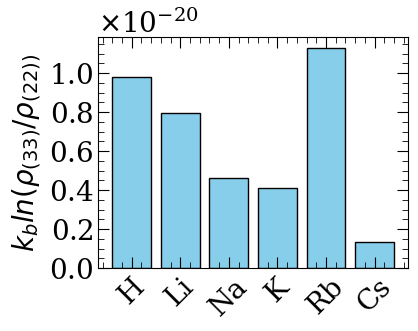

In [51]:
import matplotlib.pyplot as plt

# Example atom labels
atoms_labels = ["H", "Li", "Na", "K", "Rb", "Cs"]



# Plotting
plt.figure(figsize=(4,3))

# Bar plot
plt.bar(atoms_labels, ent_array, color='skyblue', edgecolor='black')
# Set y-axis to scientific notation
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(True)
plt.gca().yaxis.get_major_formatter().set_powerlimits((-1, 1))
# Set the font size of the scientific notation offset text
plt.gca().yaxis.offsetText.set_fontsize(20)
# Adding labels and title
# plt.xlabel("Atoms", fontsize=15)
plt.ylabel(r'$k_bln(\rho_{(33)}/\rho_{(22))}$', fontsize=20)
# plt.title("S Values for Different Atoms", fontsize=18)

# Adjusting ticks
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

# Adding grid for better readability
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
# plt.tight_layout()
plt.show()


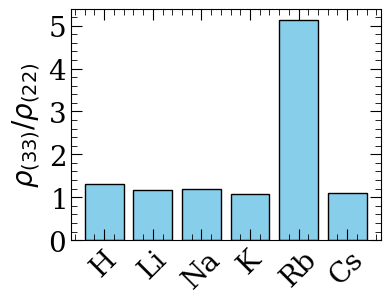

In [52]:
import matplotlib.pyplot as plt

# Example atom labels
atoms_labels = ["H", "Li", "Na", "K", "Rb", "Cs"]



# Plotting
plt.figure(figsize=(4,3))

# Bar plot
plt.bar(atoms_labels, rho_rat, color='skyblue', edgecolor='black')
# Set y-axis to scientific notation
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(True)
plt.gca().yaxis.get_major_formatter().set_powerlimits((-1, 1))
# Set the font size of the scientific notation offset text
plt.gca().yaxis.offsetText.set_fontsize(20)
# Adding labels and title
# plt.xlabel("Atoms", fontsize=15)
plt.ylabel(r'$\rho_{(33)}/\rho_{(22)}$', fontsize=20)
# plt.title("S Values for Different Atoms", fontsize=18)

# Adjusting ticks
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

# Adding grid for better readability
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
# plt.tight_layout()
plt.show()


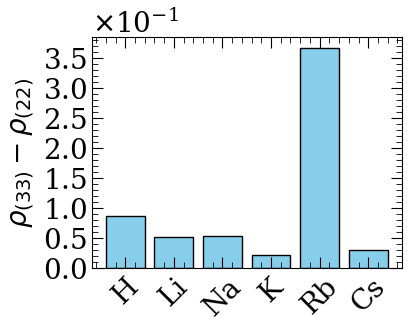

In [53]:
import matplotlib.pyplot as plt

# Example atom labels
atoms_labels = ["H", "Li", "Na", "K", "Rb", "Cs"]



# Plotting
plt.figure(figsize=(4,3))

# Bar plot
plt.bar(atoms_labels, rho_diff, color='skyblue', edgecolor='black')
# Set y-axis to scientific notation
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(True)
plt.gca().yaxis.get_major_formatter().set_powerlimits((-1, 1))
# Set the font size of the scientific notation offset text
plt.gca().yaxis.offsetText.set_fontsize(20)
# Adding labels and title
# plt.xlabel("Atoms", fontsize=15)
plt.ylabel(r'$\rho_{(33)}-\rho_{(22)}$', fontsize=20)
# plt.title("S Values for Different Atoms", fontsize=18)

# Adjusting ticks
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

# Adding grid for better readability
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
# plt.tight_layout()
plt.show()


In [54]:
import numpy as np




work = []

# Loop through each atom and its corresponding index
for atom, i in zip(atoms, range(len(atoms))):
    hbar = 1.0545718e-34 
    E1 = atom.getEnergy(df.n1.values[i], df.l1.values[i], df.j1.values[i]) * 2.41804e14
    E2 = atom.getEnergy(df.n2.values[i], df.l2.values[i], df.j2.values[i]) * 2.41804e14
    E3 = atom.getEnergy(df.n3.values[i], df.l3.values[i], df.j3.values[i]) * 2.41804e14
    omega_13 = atom.getTransitionFrequency(df.n1.values[i], df.l1.values[i], df.j1.values[i], df.n3.values[i], df.l3.values[i], df.j3.values[i])
    omega_23 = atom.getTransitionFrequency(df.n2.values[i], df.l2.values[i], df.j2.values[i], df.n3.values[i], df.l3.values[i], df.j3.values[i])
    T13 = df.Te.values[i] * 5778
    T23 = df.Te.values[i] * 5778
    T0 = df.T0.values[i]*5778*df.Te.values[i]
    # Calculate the work W
    W = 6.626e-34*(E3 - E1) - T0 * ((-hbar*np.pi*2 * omega_13 / (T13)) + (hbar*np.pi*2 * omega_23 / (T23)) + (hbar*np.pi*2 * omega_13 / (T0)))
    work.append(W)
#     # Print the result
#     print(f"The value of W is: {W} Joules")


In [55]:
import numpy as np


S_values = []

# Loop through each atom and its corresponding index
for atom, i in zip(atoms, range(len(atoms))):
    hbar = 1.0545718e-34
#     E1 = atom.getEnergy(df.n1.values[i], df.l1.values[i], df.j1.values[i]) * 2.41804e14
#     E2 = atom.getEnergy(df.n2.values[i], df.l2.values[i], df.j2.values[i]) * 2.41804e14
#     E3 = atom.getEnergy(df.n3.values[i], df.l3.values[i], df.j3.values[i]) * 2.41804e14
    omega_13 = atom.getTransitionFrequency(df.n1.values[i], df.l1.values[i], df.j1.values[i], df.n3.values[i], df.l3.values[i], df.j3.values[i])
    omega_23 = atom.getTransitionFrequency(df.n2.values[i], df.l2.values[i], df.j2.values[i], df.n3.values[i], df.l3.values[i], df.j3.values[i])
    T13 = df.Te.values[i] * 5778
    T23 = df.Te.values[i] * 5778
    T0 = df.T0.values[i]
    TB = T0 * df.Te.values[i] * 5778

    # Calculate S
    S = TB*(-hbar*omega_13 / T13 + hbar*omega_23 / T23 + hbar*omega_13 / TB)
    S_values.append(S)

# Optionally print or process S_values
# for s in S_values:
#     print(f"The value of S is: {s}")


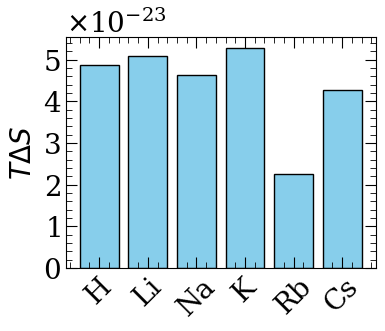

In [56]:
import matplotlib.pyplot as plt

# Example atom labels
atoms_labels = ["H", "Li", "Na", "K", "Rb", "Cs"]



# Plotting
plt.figure(figsize=(4,3))

# Bar plot
plt.bar(atoms_labels, S_values, color='skyblue', edgecolor='black')
# Set y-axis to scientific notation
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(True)
plt.gca().yaxis.get_major_formatter().set_powerlimits((-1, 1))
# Set the font size of the scientific notation offset text
plt.gca().yaxis.offsetText.set_fontsize(20)
# Adding labels and title
# plt.xlabel("Atoms", fontsize=15)
plt.ylabel(f"$T\Delta S$", fontsize=20)
# plt.title("S Values for Different Atoms", fontsize=18)

# Adjusting ticks
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

# Adding grid for better readability
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
# plt.tight_layout()
plt.show()


In [68]:
erg_array = np.array(erg_array)
work = np.array(work)

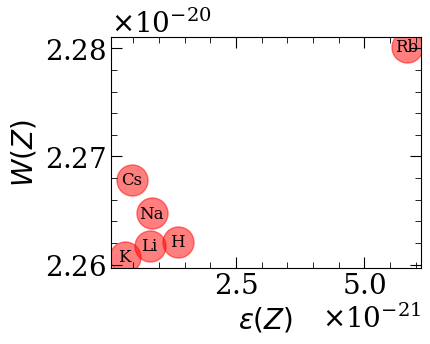

In [69]:
plt.figure(figsize=(4, 3))
# # Atomic model labels
labels = ['H', 'Li', 'Na', 'K', 'Rb', 'Cs']

# Scatter plot with atomic symbols as annotations
for i in range(len(labels)):
    plt.scatter(erg_array[i], work[i], color='red', s = 500, alpha = 0.5)  # Add black dots for clarity (optional)
    plt.text(erg_array[i], work[i], labels[i], fontsize=12, ha='center', va='center')  # Add atomic symbols

# Set the axis labels with fontsize
plt.xlabel("$\epsilon(Z)$", fontsize=20)
plt.ylabel("$W(Z)$", fontsize=20)

# Set tick parameters
plt.tick_params(axis='both', which='major', labelsize=20)

# Set y-axis to scientific notation
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(True)
plt.gca().yaxis.get_major_formatter().set_powerlimits((-1, 1))
# Set the font size of the scientific notation offset text
plt.gca().yaxis.offsetText.set_fontsize(20)
# Set x-axis to scientific notation
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().xaxis.get_major_formatter().set_scientific(True)
plt.gca().xaxis.get_major_formatter().set_powerlimits((-1, 1))
plt.gca().xaxis.offsetText.set_fontsize(20)
# plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

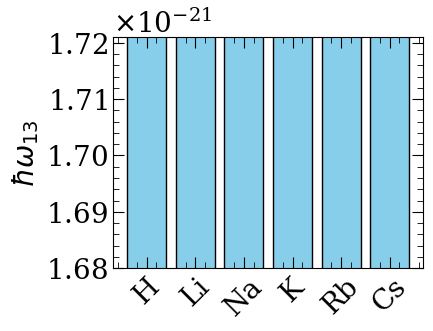

In [70]:
import matplotlib.pyplot as plt
hbar = 1.0545718e-34 
# Example atom labels
atoms_labels = ["H", "Li", "Na", "K", "Rb", "Cs"]



# Plotting
plt.figure(figsize=(4,3))

# Bar plot
plt.bar(atoms_labels, hbar*np.array(w13), color='skyblue', edgecolor='black')
# Set y-axis to scientific notation
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(True)
plt.gca().yaxis.get_major_formatter().set_powerlimits((-1, 1))
# Set the font size of the scientific notation offset text
plt.gca().yaxis.offsetText.set_fontsize(20)
# Adding labels and title
# plt.xlabel("Atoms", fontsize=15)
plt.ylabel(r"$\hbar\omega_{13}$", fontsize=20)
# plt.title("S Values for Different Atoms", fontsize=18)

# Adjusting ticks
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.ylim(1.68e-21,1.721e-21)
# Adding grid for better readability
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
# plt.tight_layout()
plt.show()


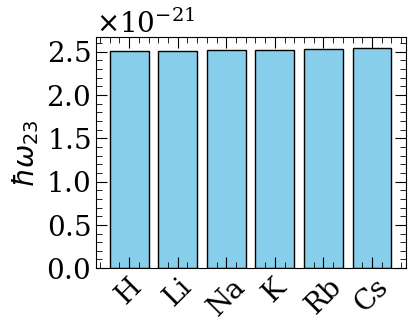

In [72]:
import matplotlib.pyplot as plt

# Example atom labels
atoms_labels = ["H", "Li", "Na", "K", "Rb", "Cs"]
hbar = 1.0545718e-34 


# Plotting
plt.figure(figsize=(4,3))

# Bar plot
plt.bar(atoms_labels, hbar*np.array(w23), color='skyblue', edgecolor='black')
# Set y-axis to scientific notation
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(True)
plt.gca().yaxis.get_major_formatter().set_powerlimits((-1, 1))
# Set the font size of the scientific notation offset text
plt.gca().yaxis.offsetText.set_fontsize(20)
# Adding labels and title
# plt.xlabel("Atoms", fontsize=15)
plt.ylabel(r"$\hbar\omega_{23}$", fontsize=20)
# plt.title("S Values for Different Atoms", fontsize=18)

# Adjusting ticks
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
# plt.ylim(1.08e-21,1.115e-21)
# Adding grid for better readability
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
# plt.tight_layout()
plt.show()
